In [4]:
from utils import *

data = import_data('MI_timesteps.txt')

data_points = []

for i in range(0, 11000):
    e = create_delay_embedding(data, i, 351)
    data_points.append(vectorize_delay_embedding(e))

# PCA

In [5]:
# Centering the matrix

X_m = data_points - np.mean(data_points)

In [6]:
# Decomposing the matrix

u, s, vh = np.linalg.svd(X_m, full_matrices=True)

u.shape, s.shape, vh.shape

((11000, 11000), (1053,), (1053, 1053))

In [7]:
# Reshaping matrix s

smat = np.zeros((u.shape[1], vh.shape[0]), dtype=float)
smat[:s.size, :s.size] = np.diag(s)
    
smat.shape

(11000, 1053)

In [9]:
# Projecting to the first three components

s_diag = np.diag(s)

for i in range(smat.shape[0]):
    if (i >= 3):
        smat[i, :] = 0

In [10]:
# Calculating the reduced system

smat = np.zeros((u.shape[1], vh.shape[0]), dtype=float)
smat[:s.size, :s.size] = np.diag(s)

for i in range(smat.shape[0]):
    if (i >= 3):
        smat[i, :] = 0
    
X_red = u@smat@vh

X_red.shape



(11000, 1053)

(11000,)
(1053,)


<Figure size 432x288 with 0 Axes>

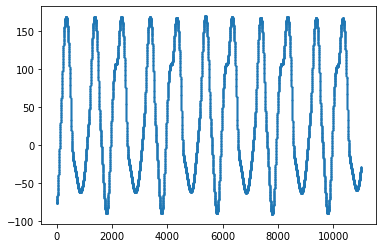

In [39]:
# Plotting the reduced system
import matplotlib.pyplot as plt

time_space = np.linspace(0, 11000, 11000)
print(time_space.shape)

fig_single = plt.figure()
fig_single, ax_single = plt.subplots()
print(X_red[1, :].shape)
ax_single.scatter(time_space, X_red[:, 1].T, s = 1)

# fig_single.savefig("images/pedestrian_single.png")